In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "64"

In [2]:
import os
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
%matplotlib inline

In [3]:
hp.disable_warnings()

In [4]:
plt.style.use("seaborn-talk")

In [5]:
import pysm3 as pysm
import pysm3.units as u

In [6]:
nside = 2048
degraded_nside = 2048 # to speedup notebook for testing
lmax = 1000

In [7]:
planck_mask_filename_QU = "COM_Mask_CMB-common-Mask-Pol_2048_R3.00.fits" 

In [8]:
planck_mask_filename_I = "COM_Mask_CMB-common-Mask-Int_2048_R3.00.fits"

In [9]:
planck_mask_filenames= [planck_mask_filename_QU, planck_mask_filename_I]

In [10]:
for planck_mask_filename in [planck_mask_filename_QU, planck_mask_filename_I]:
    if not os.path.exists(os.path.join("data", planck_mask_filename)):
        !wget -O data/$planck_mask_filename https://irsa.ipac.caltech.edu/data/Planck/release_3/ancillary-data/masks/$planck_mask_filename

In [11]:
fits.open("data/" + planck_mask_filename_QU)[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                    4 / width of table in bytes                        
NAXIS2  =             50331648 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    1 / number of fields in each row                   
COMMENT  -------------------------------------------------------------          
COMMENT  Further details in the Planck Legacy Archive and Explanatory Supplement
COMMENT  http://www.cosmos.esa.int/web/planck/pla/                              
COMMENT  -------------------------------------------------------------          
COMMENT                     

In [12]:
planck_mask = np.logical_and(*[hp.read_map(os.path.join("data", planck_mask_filename)) for  planck_mask_filename in planck_mask_filenames])

In [13]:
np.unique(planck_mask) # no apodization

array([False,  True])

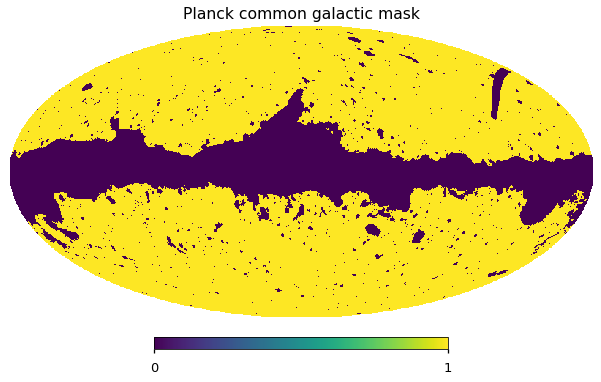

In [14]:
hp.mollview(planck_mask, title=f"Planck common galactic mask")

In [15]:
dust_map_filename = "COM_CompMap_IQU-thermaldust-gnilc-varres_2048_R3.00.fits"
# dust_map_filename = "COM_CompMap_Dust-GNILC-Beam-FWHM_0128_R2.00.fits"

In [16]:
dust_map_path = os.path.join("data", dust_map_filename)

In [17]:
if not os.path.exists(dust_map_path):
    !wget -O $dust_map_path http://pla.esac.esa.int/pla/aio/product-action?MAP.MAP_ID=$dust_map_filename

In [18]:
fits.open(dust_map_path)[1].data.dtype

dtype((numpy.record, [('I_STOKES', '>f4'), ('Q_STOKES', '>f4'), ('U_STOKES', '>f4'), ('II_COV', '>f4'), ('IQ_COV', '>f4'), ('IU_COV', '>f4'), ('QQ_COV', '>f4'), ('QU_COV', '>f4'), ('UU_COV', '>f4'), ('FWHM', '>f4')]))

In [19]:
try:
    fwhm = hp.read_map(dust_map_path, ["FWHM"])
except KeyError:
    fwhm = hp.read_map(dust_map_path)

In [20]:
set(fwhm)

{5.0,
 6.999998569488525,
 9.999995231628418,
 15.0,
 20.000049591064453,
 29.999998092651367,
 59.99995040893555,
 80.00007629394531}

In [21]:
fwhm = hp.ud_grade(fwhm, nside)

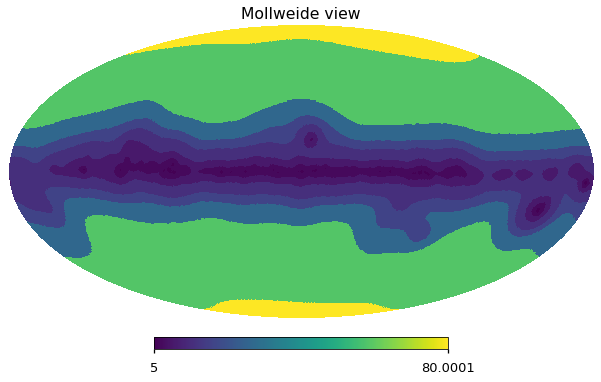

In [22]:
hp.mollview(fwhm, xsize=5000)

In [23]:
R = dust_map_filename.split(".")[-3].split("_")[-1]
R

'R3'

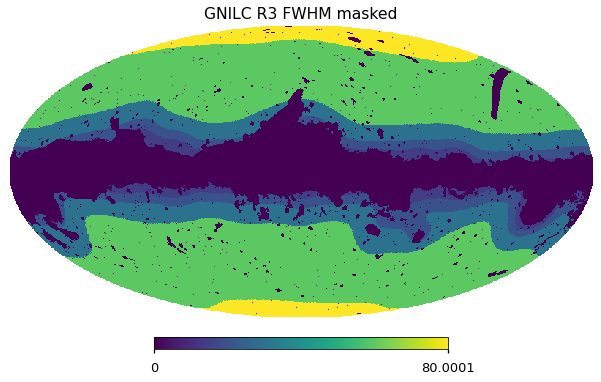

In [24]:
hp.mollview(fwhm * planck_mask, title=f"GNILC {R} FWHM masked")

In [25]:
masked_fwhm = fwhm * planck_mask

In [26]:
values = np.unique(masked_fwhm)

In [27]:
values

array([ 0.        ,  9.99999523, 15.        , 20.00004959, 29.99999809,
       59.99995041, 80.00007629])

In [28]:
for v in values:
    print("{:.0f},{:.2f}%".format(v,(masked_fwhm==v).sum()/len(masked_fwhm)*100))

0,25.90%
10,0.00%
15,2.68%
20,6.65%
30,14.71%
60,44.62%
80,5.43%
